<a href="https://colab.research.google.com/github/marina554/accounting-practice/blob/main/Depreciation(%E6%B8%9B%E4%BE%A1%E5%84%9F%E5%8D%B4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# 1. Load the font file directly
font_path = "/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc"
jp_font = FontProperties(fname=font_path)

# 2. Tell matplotlib to use it everywhere
mpl.rcParams['font.family'] = jp_font.get_name()
mpl.rcParams['font.sans-serif'] = [jp_font.get_name()]



📘 Depreciation Schedule for Vehicle
   Year  Depreciation  Book Value
0     1      540000.0   2460000.0
1     2      540000.0   1920000.0
2     3      540000.0   1380000.0
3     4      540000.0    840000.0
4     5      540000.0    300000.0

📘 Depreciation Schedule for Machine
   Year   Depreciation     Book Value
0     1  369042.655520  630957.344480
1     2  232850.173927  398107.170553
2     3  146918.527403  251188.643151
3     4   92699.323905  158489.319246
4     5   58489.319246  100000.000000


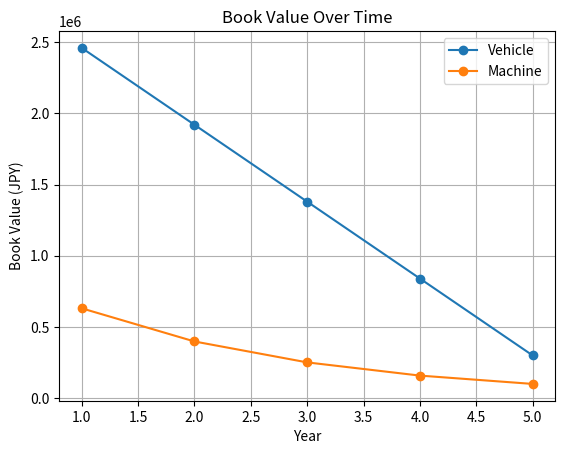

In [55]:
# depreciation_portfolio.py
import pandas as pd
import matplotlib.pyplot as plt

class Asset:
    def __init__(self, name, cost, salvage, life, method="straight_line"):
        self.name = name
        self.cost = cost
        self.salvage = salvage
        self.life = life
        self.method = method

    def depreciation_schedule(self):
        years = list(range(1, self.life + 1))
        data = []

        if self.method == "straight_line":
            dep = (self.cost - self.salvage) / self.life
            book_value = self.cost
            for y in years:
                book_value -= dep
                data.append({"Year": y, "Depreciation": dep, "Book Value": book_value})

        elif self.method == "declining_balance":
            rate = 1 - (self.salvage / self.cost) ** (1 / self.life)
            book_value = self.cost
            for y in years:
                dep = book_value * rate
                book_value -= dep
                if book_value < self.salvage:
                    dep += (book_value - self.salvage)
                    book_value = self.salvage
                data.append({"Year": y, "Depreciation": dep, "Book Value": book_value})

        return pd.DataFrame(data)


# --- Example Usage ---
if __name__ == "__main__":
    asset1 = Asset("Vehicle", 3000000, 300000, 5, "straight_line")
    asset2 = Asset("Machine", 1000000, 100000, 5, "declining_balance")

    for asset in [asset1, asset2]:
        df = asset.depreciation_schedule()
        print(f"\n📘 Depreciation Schedule for {asset.name}")
        print(df)

        plt.plot(df["Year"], df["Book Value"], marker="o", label=asset.name)

    plt.title("Book Value Over Time")
    plt.xlabel("Year")
    plt.ylabel("Book Value (JPY)")
    plt.legend()
    plt.grid(True)
    plt.show()


# --- 使用例 ---
if __name__ == "__main__":
    asset1 = Asset("車両", 3000000, 300000, 5, "straight_line")
    asset2 = Asset("機械", 1000000, 100000, 5, "declining_balance")

    for asset in [asset1, asset2]:
        df = asset.depreciation_schedule()
        print(f"\n📘 {asset.name} の減価償却スケジュール")
        print(df)

        plt.plot(df["Year"], df["Book Value"], marker="o", label=asset.name)

    plt.title("減価償却による簿価の推移")
    plt.xlabel("年")
    plt.ylabel("簿価 (円)")
    plt.legend()
    plt.grid(True)
    plt.show()